In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(["PassengerId",'Name','Ticket','Cabin'],axis=1)

In [6]:
df=df.dropna()

In [7]:
# specifies the parameters of our graphs
fig=plt.figure(figsize=(18,6),dpi=1600)
alpha=alpha_scatterplot=0.2
alpha=alpha_bar_chart=0.55

# lets us plot many diffrent shaped graphs together
ax1=plt.subplot2grid((2,3),(0,0))

# plots a bar graph of those who surived vs those who did not
df.Survived.value_counts().plot(kind="bar",alpha=alpha_bar_chart)
ax1.set_xlim(-1,2)
# puts a title on our graph
plt.title("Distribution of Survival, (1=Survived , 0=died)")


plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age ,alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs 
plt.grid(b=True,which="major", axis="y")
plt.title("Survival by Age, (1 = Survived)")


ax3=plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh",alpha=alpha_bar_chart)
ax3.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title("Class Distribution")


plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass==1].plot(kind="kde")
df.Age[df.Pclass==2].plot(kind="kde")
df.Age[df.Pclass==3].plot(kind="kde")
plt.grid(b=True,which="major",axis="y")
plt.xlabel("Age")
plt.title(" Age Distribution with in classes")
plt.legend(("1st Class" , "2nd class", "3rd class"),loc="best")


ax5=plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind="bar",alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title("passengers per boarding location")
plt.show()

<Figure size 432x432 with 0 Axes>

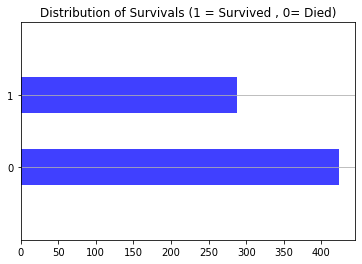

In [8]:
plt.figure(figsize=(6,6))
fig ,ax=plt.subplots()
df.Survived.value_counts().plot(kind="barh", color="blue",alpha=0.75)
ax.set_ylim(-1,len(df.Survived.value_counts()))
plt.grid(b=True , which="major" ,axis="y")
plt.title("Distribution of Survivals (1 = Survived , 0= Died)")
plt.show()

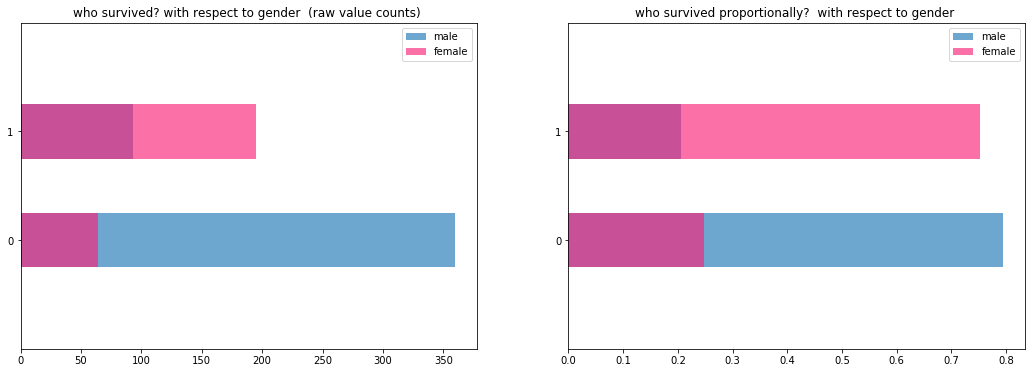

In [9]:
fig = plt.figure(figsize=(18,6))


#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male =df.Survived[df.Sex=="male"].value_counts().sort_index()
df_female =df.Survived[df.Sex=="female"].value_counts().sort_index()


ax=fig.add_subplot(121)
df_male.plot(kind="barh",label="male",alpha=0.65)
df_female.plot(kind="barh",label="female",color="#FA2379",alpha=0.65)
plt.title("who survived? with respect to gender  (raw value counts) ")
plt.legend(loc="best")

ax.set_ylim(-1,2)

#adjust graph to display the proportions of survival by gender
ax1 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind="barh",label="male",alpha=0.65)
(df_female/float(df_female.sum())).plot(kind="barh",label="female",color="#FA2379",alpha=0.65)
plt.title("who survived proportionally?  with respect to gender ")
plt.legend(loc="best")
ax1.set_ylim(-1, 2)
plt.show()

In [10]:
#splliting rthe independent and dependent variables
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
#function for encoding
def le(var):
    le=LabelEncoder()
    var_scale=le.fit_transform(var)
    return var_scale
x[:,1] = le(x[:,1])
x[:,6] = le(x[:,6])
x

array([[3, 1, 22.0, ..., 0, 7.25, 2],
       [1, 0, 38.0, ..., 0, 71.2833, 0],
       [3, 0, 26.0, ..., 0, 7.925, 2],
       ...,
       [1, 0, 19.0, ..., 0, 30.0, 2],
       [1, 1, 26.0, ..., 0, 30.0, 0],
       [3, 1, 32.0, ..., 0, 7.75, 1]], dtype=object)

In [13]:
#function for scaling
def scaling(var):
    sc=StandardScaler()
    var_scale=sc.fit_transform(var)
    return var_scale
x = scaling(x)

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
#splitting into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2, random_state=7)

In [16]:
#importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve

In [17]:
#logistic regression
def lr():
    lr = LogisticRegression()
    lr=lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,lr_pred)
    cr = classification_report(y_test,lr_pred)
    cm = metrics.confusion_matrix(y_test,lr_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", lr_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
lr()    


Accuracy score for target :  0.7902097902097902

predicted values for input data : 

 [1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[78 10]
 [20 35]]

classification_report : 

               precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.78      0.64      0.70        55

    accuracy                           0.79       143
   macro avg       0.79      0.76      0.77       143
weighted avg       0.79      0.79      0.79       143



In [18]:
#Random forest
def rf():
    rf=RandomForestClassifier(random_state=7)
    rf=rf.fit(x_train,y_train)
    rf_pred =rf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,rf_pred)
    cm = metrics.confusion_matrix(y_test,rf_pred)
    cr = classification_report(y_test,rf_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", rf_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
rf()


Accuracy score for target :  0.7972027972027972

predicted values for input data : 

 [1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[77 11]
 [18 37]]

classification_report : 

               precision    recall  f1-score   support

           0       0.81      0.88      0.84        88
           1       0.77      0.67      0.72        55

    accuracy                           0.80       143
   macro avg       0.79      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143



In [19]:
#decesion tree
def dt():
    dt=DecisionTreeClassifier(random_state=7)
    dt=dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,dt_pred)
    cm = metrics.confusion_matrix(y_test,dt_pred)
    cr = classification_report(y_test,dt_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", dt_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
dt()    


Accuracy score for target :  0.7342657342657343

predicted values for input data : 

 [1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0
 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[71 17]
 [21 34]]

classification_report : 

               precision    recall  f1-score   support

           0       0.77      0.81      0.79        88
           1       0.67      0.62      0.64        55

    accuracy                           0.73       143
   macro avg       0.72      0.71      0.72       143
weighted avg       0.73      0.73      0.73       143



In [20]:
# naive bayes
def nb():
    nb =GaussianNB()
    nb=nb.fit(x_train,y_train)
    nb_pred = nb.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,nb_pred)
    cm = metrics.confusion_matrix(y_test,nb_pred)
    cr = classification_report(y_test,nb_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", nb_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
nb() 


Accuracy score for target :  0.8111888111888111

predicted values for input data : 

 [1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[77 11]
 [16 39]]

classification_report : 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85        88
           1       0.78      0.71      0.74        55

    accuracy                           0.81       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



In [21]:
# finding best n value by grid search cv method
def grid():
    params = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}
    KNN =KNeighborsClassifier()
    model = GridSearchCV(KNN,params,cv=7)
    model.fit(x_train,y_train)
    model.best_params_
    print(model.best_params_)
grid()

{'n_neighbors': 5}


In [22]:
# kneighbors classifier
def knn():
    knn=KNeighborsClassifier(n_neighbors=5)
    knn=knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,knn_pred)
    cm = metrics.confusion_matrix(y_test,knn_pred)
    cr = classification_report(y_test,knn_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", knn_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
knn()


Accuracy score for target :  0.7902097902097902

predicted values for input data : 

 [1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[74 14]
 [16 39]]

classification_report : 

               precision    recall  f1-score   support

           0       0.82      0.84      0.83        88
           1       0.74      0.71      0.72        55

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



In [23]:
# svc with kernel as "rbf"
def svc_rbf():
    sv=SVC(kernel="rbf")
    sv=sv.fit(x_train,y_train)
    sv_pred=sv.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", sv_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
svc_rbf()


Accuracy score for target :  0.8111888111888111

predicted values for input data : 

 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]

confusion matrix : 

 [[80  8]
 [19 36]]

classification_report : 

               precision    recall  f1-score   support

           0       0.81      0.91      0.86        88
           1       0.82      0.65      0.73        55

    accuracy                           0.81       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.81      0.81       143



In [24]:
#svc kernel as "poly"
def svc_poly():
    sv=SVC(kernel="poly")
    sv=sv.fit(x_train,y_train)
    sv_pred=sv.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", sv_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
svc_poly()


Accuracy score for target :  0.7972027972027972

predicted values for input data : 

 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

confusion matrix : 

 [[81  7]
 [22 33]]

classification_report : 

               precision    recall  f1-score   support

           0       0.79      0.92      0.85        88
           1       0.82      0.60      0.69        55

    accuracy                           0.80       143
   macro avg       0.81      0.76      0.77       143
weighted avg       0.80      0.80      0.79       143



In [25]:
#svc with kernel as "linear"
def svc_linear():
    sv=SVC(kernel="linear")
    sv=sv.fit(x_train,y_train)
    sv_pred=sv.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", sv_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
svc_linear()


Accuracy score for target :  0.7692307692307693

predicted values for input data : 

 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]

confusion matrix : 

 [[76 12]
 [21 34]]

classification_report : 

               precision    recall  f1-score   support

           0       0.78      0.86      0.82        88
           1       0.74      0.62      0.67        55

    accuracy                           0.77       143
   macro avg       0.76      0.74      0.75       143
weighted avg       0.77      0.77      0.76       143



In [26]:
def ab():
    ab= AdaBoostClassifier(n_estimators=100,
                          learning_rate=2)
    ab=ab.fit(x_train,y_train)
    ab_pred = ab.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,ab_pred)
    cm = metrics.confusion_matrix(y_test,ab_pred)
    cr = classification_report(y_test,ab_pred)
    print("\nAccuracy score for target : ",accuracy)
    print("\npredicted values for input data : \n\n", ab_pred)
    print("\nconfusion matrix : \n\n",cm)
    print("\nclassification_report : \n\n",cr)
ab()


Accuracy score for target :  0.7692307692307693

predicted values for input data : 

 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]

confusion matrix : 

 [[76 12]
 [21 34]]

classification_report : 

               precision    recall  f1-score   support

           0       0.78      0.86      0.82        88
           1       0.74      0.62      0.67        55

    accuracy                           0.77       143
   macro avg       0.76      0.74      0.75       143
weighted avg       0.77      0.77      0.76       143



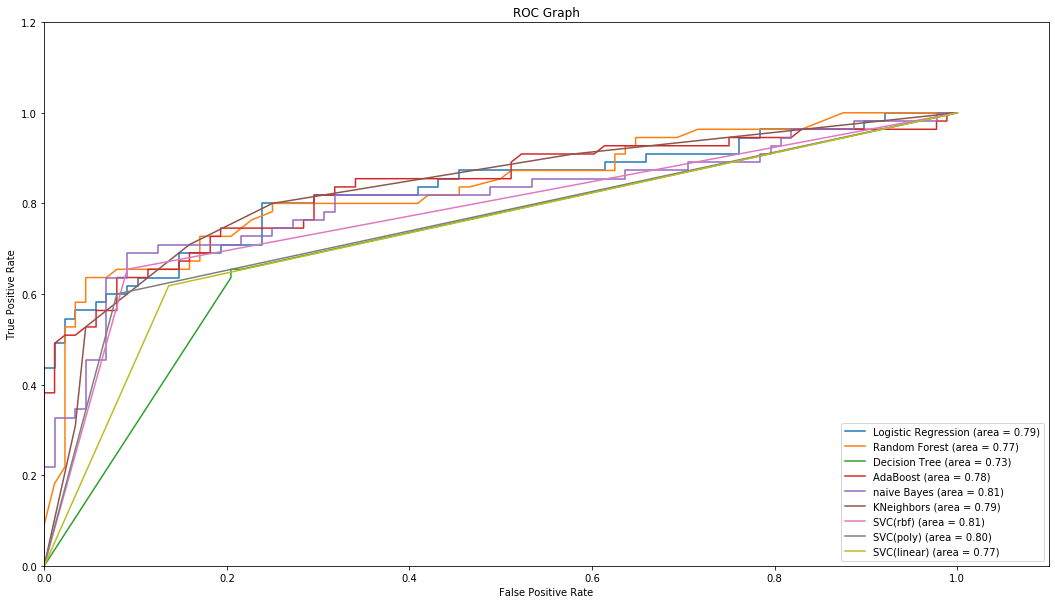

In [27]:
# roc graph of the data

def roc_graph():
    rf =RandomForestClassifier()
    rf=rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    rf_accuracy=metrics.accuracy_score(y_test,pred)%100
    cr = classification_report(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)


    dt =DecisionTreeClassifier()
    dt=dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    dt_accuracy=metrics.accuracy_score(y_test,pred)%100
    cr = classification_report(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)


    lr =LogisticRegression()
    lr=lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    lr_accuracy=metrics.accuracy_score(y_test,pred)%100
    cr = classification_report(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)


    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
    abc= abc.fit(x_train, y_train)
    pred = abc.predict(x_test)
    abc_accuracy=metrics.accuracy_score(y_test,pred)%100
    cr = classification_report(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)
    
    nb =GaussianNB()
    nb=nb.fit(x_train,y_train)
    pred = nb.predict(x_test)
    nb_accuracy = metrics.accuracy_score(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)
    cr = classification_report(y_test,pred)
    
    
    knn=KNeighborsClassifier(n_neighbors=5)
    knn=knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    knn_accuracy = metrics.accuracy_score(y_test,pred)
    cm = metrics.confusion_matrix(y_test,pred)
    cr = classification_report(y_test,pred)
    
    
    
    
    sv_rbf=SVC(kernel="rbf")
    sv=sv_rbf.fit(x_train,y_train)
    sv_pred=sv_rbf.predict(x_test)
    sv_rbf_accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    
    
    
    sv_poly=SVC(kernel="poly")
    sv=sv_poly.fit(x_train,y_train)
    sv_pred=sv_poly.predict(x_test)
    sv_poly_accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    
    
    
    
    sv_linear=SVC(kernel="linear")
    sv=sv_linear.fit(x_train,y_train)
    sv_pred=sv_linear.predict(x_test)
    sv_linear_accuracy = metrics.accuracy_score(y_test,sv_pred)
    cm = metrics.confusion_matrix(y_test,sv_pred)
    cr = classification_report(y_test,sv_pred)
    
    
    
    
    
    
    
    
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
    dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
    abc_fpr, abc_tpr, abc_thresholds = roc_curve(y_test, abc.predict_proba(x_test)[:,1])
    nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
    knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
    sv_rbf_fpr, sv_rbf_tpr, sv_rbf_thresholds = roc_curve(y_test, sv_rbf.predict(x_test))
    sv_poly_fpr, sv_poly_tpr, sv_poly_thresholds = roc_curve(y_test, sv_poly.predict(x_test))
    sv_linear_fpr, sv_linear_tpr, sv_linear_thresholds = roc_curve(y_test, sv_linear.predict(x_test))
    

    plt.figure(figsize=(18,10))

    # Plot Logistic Regression ROC
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_accuracy)

    # Plot Random Forest ROC
    plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_accuracy)

    # Plot Decision Tree ROC
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_accuracy)

    # Plot AdaBoost ROC
    plt.plot(abc_fpr, abc_tpr, label='AdaBoost (area = %0.2f)' % abc_accuracy)
    
    plt.plot(nb_fpr, nb_tpr, label='naive Bayes (area = %0.2f)' % nb_accuracy)
    
    plt.plot(knn_fpr, knn_tpr, label='KNeighbors (area = %0.2f)' % knn_accuracy)
    
    plt.plot(sv_rbf_fpr, sv_rbf_tpr, label='SVC(rbf) (area = %0.2f)' % sv_rbf_accuracy)
    
    
    plt.plot(sv_poly_fpr, sv_poly_tpr, label='SVC(poly) (area = %0.2f)' % sv_poly_accuracy)

    plt.plot(sv_linear_fpr, sv_linear_tpr, label='SVC(linear) (area = %0.2f)' % sv_linear_accuracy)
    
    
    plt.xlim([0.0, 1.1])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Graph')
    plt.legend(loc="lower right")
    plt.show()
    return

roc_graph()

<h2>After total Analysis of titanic data with machine learning algorithms we come to know that </h2>

<h3> SVC(rbf) and Naive Bayes has the same Accuracy<h3>

# <h1>The Accuracy is 81.1%</h1>